<a href="https://colab.research.google.com/github/cgree136/D3/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimizer: SGD, Learning Rate: 0.1, Epoch: 500, Loss: 2.811594009399414, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 1000, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 1500, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 2000, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 2500, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 3000, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 3500, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 4000, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Learning Rate: 0.1, Epoch: 4500, Loss: 2.811593770980835, Validation Loss: 4.403770446777344
Optimizer: SGD, Lear

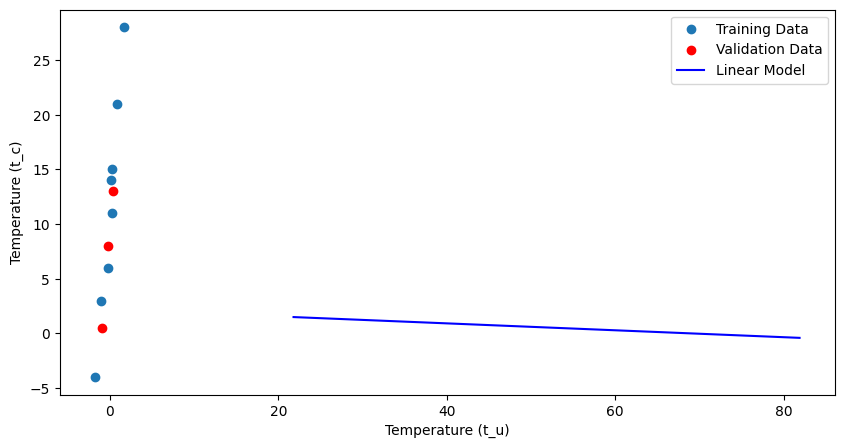

In [ ]:
#PROBLEM 1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Given data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = np.array(t_c)
t_u = np.array(t_u)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(t_u, t_c, test_size=0.2, random_state=42)

# Reshape the input features to 2D arrays
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert the data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

# Define the linear model
def quadratic_model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Function to create and train a linear regression model
def train_quadratic_regression(X_train, y_train, X_val, y_val, optimizer, learning_rate, epochs):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1, use_bias=True)
    ])

    # Custom loss function for the linear model
    def custom_loss(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss=custom_loss)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)
    return model, history.history

# Hyperparameters to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
report_interval = 500

# Train models with different learning rates using both SGD and ADAM optimizers
results = []

for lr in learning_rates:
    for optimizer_name, optimizer in [('SGD', tf.optimizers.SGD), ('ADAM', tf.optimizers.Adam)]:
        model, history = train_quadratic_regression(X_train, y_train, X_val, y_val, optimizer, lr, epochs)

        # Print loss for every 500 epochs
        for epoch in range(report_interval, epochs + 1, report_interval):
            loss = history['loss'][epoch - 1]
            val_loss = history['val_loss'][epoch - 1]
            print(f"Optimizer: {optimizer_name}, Learning Rate: {lr}, Epoch: {epoch}, Loss: {loss}, Validation Loss: {val_loss}")

        results.append((optimizer_name, lr, history['val_loss'][-1]))

# Find the best model
best_result = min(results, key=lambda x: x[2])
best_optimizer, best_lr, best_val_loss = best_result
print(f"Best model: Optimizer = {best_optimizer}, Learning Rate = {best_lr}, Validation Loss = {best_val_loss}")

# Visualize the Linear model against the data
t_range = np.linspace(min(t_u), max(t_u), 100)
quadratic_model_preds = model.predict(scaler.transform(t_range.reshape(-1, 1)))

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_val, y_val, label='Validation Data', color='r')
plt.plot(t_range, quadratic_model_preds, label='Linear Model', color='b')
plt.xlabel('Temperature (t_u)')
plt.ylabel('Temperature (t_c)')
plt.legend()
plt.show()

In [ ]:
#PROBLEM 2
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the housing dataset
data = pd.DataFrame({
    'price': [13300000,	12250000,	12250000,	12215000,	11410000,	10850000,	10150000,	10150000,	9870000,	9800000,	9800000,	9681000,	9310000,	9240000,	9240000,	9100000,	9100000,	8960000,	8890000,	8855000,	8750000,	8680000,	8645000,	8645000,	8575000,	8540000,	8463000,	8400000,	8400000,	8400000,	8400000,	8400000,	8295000,	8190000,	8120000,	8080940,	8043000,	7980000,	7962500,	7910000,	7875000,	7840000,	7700000,	7700000,	7560000,	7560000,	7525000,	7490000,	7455000,	7420000,	7420000,	7420000,	7350000,	7350000,	7350000,	7350000,	7343000,	7245000,	7210000,	7210000,	7140000,	7070000,	7070000,	7035000,	7000000,	6930000,	6930000,	6895000,	6860000,	6790000,	6790000,	6755000,	6720000,	6685000,	6650000,	6650000,	6650000,	6650000,	6650000,	6650000,	6629000,	6615000,	6615000,	6580000,	6510000,	6510000,	6510000,	6475000,	6475000,	6440000,	6440000,	6419000,	6405000,	6300000,	6300000,	6300000,	6300000,	6300000,	6293000,	6265000,	6230000,	6230000,	6195000,	6195000,	6195000,	6160000,	6160000,	6125000,	6107500,	6090000,	6090000,	6090000,	6083000,	6083000,	6020000,	6020000,	6020000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5943000,	5880000,	5880000,	5873000,	5873000,	5866000,	5810000,	5810000,	5810000,	5803000,	5775000,	5740000,	5740000,	5740000,	5740000,	5740000,	5652500,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5565000,	5565000,	5530000,	5530000,	5530000,	5523000,	5495000,	5495000,	5460000,	5460000,	5460000,	5460000,	5425000,	5390000,	5383000,	5320000,	5285000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5243000,	5229000,	5215000,	5215000,	5215000,	5145000,	5145000,	5110000,	5110000,	5110000,	5110000,	5075000,	5040000,	5040000,	5040000,	5040000,	5033000,	5005000,	4970000,	4970000,	4956000,	4935000,	4907000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4893000,	4893000,	4865000,	4830000,	4830000,	4830000,	4830000,	4795000,	4795000,	4767000,	4760000,	4760000,	4760000,	4753000,	4690000,	4690000,	4690000,	4690000,	4690000,	4690000,	4655000,	4620000,	4620000,	4620000,	4620000,	4620000,	4613000,	4585000,	4585000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4543000,	4543000,	4515000,	4515000,	4515000,	4515000,	4480000,	4480000,	4480000,	4480000,	4480000,	4473000,	4473000,	4473000,	4445000,	4410000,	4410000,	4403000,	4403000,	4403000,	4382000,	4375000,	4340000,	4340000,	4340000,	4340000,	4340000,	4319000,	4305000,	4305000,	4277000,	4270000,	4270000,	4270000,	4270000,	4270000,	4270000,	4235000,	4235000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4193000,	4193000,	4165000,	4165000,	4165000,	4130000,	4130000,	4123000,	4098500,	4095000,	4095000,	4095000,	4060000,	4060000,	4060000,	4060000,	4060000,	4025000,	4025000,	4025000,	4007500,	4007500,	3990000,	3990000,	3990000,	3990000,	3990000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3885000,	3885000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3836000,	3815000,	3780000,	3780000,	3780000,	3780000,	3780000,	3780000,	3773000,	3773000,	3773000,	3745000,	3710000,	3710000,	3710000,	3710000,	3710000,	3703000,	3703000,	3675000,	3675000,	3675000,	3675000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3633000,	3605000,	3605000,	3570000,	3570000,	3570000,	3570000,	3535000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3493000,	3465000,	3465000,	3465000,	3430000,	3430000,	3430000,	3430000,	3430000,	3430000,	3423000,	3395000,	3395000,	3395000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3353000,	3332000,	3325000,	3325000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3255000,	3255000,	3234000,	3220000,	3220000,	3220000,	3220000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3143000,	3129000,	3118850,	3115000,	3115000,	3115000,	3087000,	3080000,	3080000,	3080000,	3080000,	3045000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3003000,	2975000,	2961000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2870000,	2870000,	2870000,	2870000,	2852500,	2835000,	2835000,	2835000,	2800000,	2800000,	2730000,	2730000,	2695000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2653000,	2653000,	2604000,	2590000,	2590000,	2590000,	2520000,	2520000,	2520000,	2485000,	2485000,	2450000,	2450000,	2450000,	2450000,	2450000,	2450000,	2408000,	2380000,	2380000,	2380000,	2345000,	2310000,	2275000,	2275000,	2275000,	2240000,	2233000,	2135000,	2100000,	2100000,	2100000,	1960000,	1890000,	1890000,	1855000,	1820000,	1767150,	1750000,	1750000,	1750000],
    'area': [7420,	8960,	9960,	7500,	7420,	7500,	8580,	16200,	8100,	5750,	13200,	6000,	6550,	3500,	7800,	6000,	6600,	8500,	4600,	6420,	4320,	7155,	8050,	4560,	8800,	6540,	6000,	8875,	7950,	5500,	7475,	7000,	4880,	5960,	6840,	7000,	7482,	9000,	6000,	6000,	6550,	6360,	6480,	6000,	6000,	6000,	6000,	6600,	4300,	7440,	7440,	6325,	6000,	5150,	6000,	6000,	11440,	9000,	7680,	6000,	6000,	8880,	6240,	6360,	11175,	8880,	13200,	7700,	6000,	12090,	4000,	6000,	5020,	6600,	4040,	4260,	6420,	6500,	5700,	6000,	6000,	4000,	10500,	6000,	3760,	8250,	6670,	3960,	7410,	8580,	5000,	6750,	4800,	7200,	6000,	4100,	9000,	6400,	6600,	6000,	6600,	5500,	5500,	6350,	5500,	4500,	5450,	6420,	3240,	6615,	6600,	8372,	4300,	9620,	6800,	8000,	6900,	3700,	6420,	7020,	6540,	7231,	6254,	7320,	6525,	15600,	7160,	6500,	5500,	11460,	4800,	5828,	5200,	4800,	7000,	6000,	5400,	4640,	5000,	6360,	5800,	6660,	10500,	4800,	4700,	5000,	10500,	5500,	6360,	6600,	5136,	4400,	5400,	3300,	3650,	6100,	6900,	2817,	7980,	3150,	6210,	6100,	6600,	6825,	6710,	6450,	7800,	4600,	4260,	6540,	5500,	10269,	8400,	5300,	3800,	9800,	8520,	6050,	7085,	3180,	4500,	7200,	3410,	7980,	3000,	3000,	11410,	6100,	5720,	3540,	7600,	10700,	6600,	4800,	8150,	4410,	7686,	2800,	5948,	4200,	4520,	4095,	4120,	5400,	4770,	6300,	5800,	3000,	2970,	6720,	4646,	12900,	3420,	4995,	4350,	4160,	6040,	6862,	4815,	7000,	8100,	3420,	9166,	6321,	10240,	6440,	5170,	6000,	3630,	9667,	5400,	4320,	3745,	4160,	3880,	5680,	2870,	5010,	4510,	4000,	3840,	3760,	3640,	2550,	5320,	5360,	3520,	8400,	4100,	4990,	3510,	3450,	9860,	3520,	4510,	5885,	4000,	8250,	4040,	6360,	3162,	3510,	3750,	3968,	4900,	2880,	4880,	4920,	4950,	3900,	4500,	1905,	4075,	3500,	6450,	4032,	4400,	10360,	3400,	6360,	6360,	4500,	2175,	4360,	7770,	6650,	2787,	5500,	5040,	5850,	2610,	2953,	2747,	4410,	4000,	2325,	4600,	3640,	5800,	7000,	4079,	3520,	2145,	4500,	8250,	3450,	4840,	4080,	4046,	4632,	5985,	6060,	3600,	3680,	4040,	5600,	5900,	4992,	4340,	3000,	4320,	3630,	3460,	5400,	4500,	3460,	4100,	6480,	4500,	3960,	4050,	7260,	5500,	3000,	3290,	3816,	8080,	2145,	3780,	3180,	5300,	3180,	7152,	4080,	3850,	2015,	2176,	3350,	3150,	4820,	3420,	3600,	5830,	2856,	8400,	8250,	2520,	6930,	3480,	3600,	4040,	6020,	4050,	3584,	3120,	5450,	3630,	3630,	5640,	3600,	4280,	3570,	3180,	3000,	3520,	5960,	4130,	2850,	2275,	3520,	4500,	4000,	3150,	4500,	4500,	3640,	3850,	4240,	3650,	4600,	2135,	3036,	3990,	7424,	3480,	3600,	3640,	5900,	3120,	7350,	3512,	9500,	5880,	12944,	4900,	3060,	5320,	2145,	4000,	3185,	3850,	2145,	2610,	1950,	4040,	4785,	3450,	3640,	3500,	4960,	4120,	4750,	3720,	3750,	3100,	3185,	2700,	2145,	4040,	4775,	2500,	3180,	6060,	3480,	3792,	4040,	2145,	5880,	4500,	3930,	3640,	4370,	2684,	4320,	3120,	3450,	3986,	3500,	4095,	1650,	3450,	6750,	9000,	3069,	4500,	5495,	2398,	3000,	3850,	3500,	8100,	4960,	2160,	3090,	4500,	3800,	3090,	3240,	2835,	4600,	5076,	3750,	3630,	8050,	4352,	3000,	5850,	4960,	3600,	3660,	3480,	2700,	3150,	6615,	3040,	3630,	6000,	5400,	5200,	3300,	4350,	2640,	2650,	3960,	6800,	4000,	4000,	3934,	2000,	3630,	2800,	2430,	3480,	4000,	3185,	4000,	2910,	3600,	4400,	3600,	2880,	3180,	3000,	4400,	3000,	3210,	3240,	3000,	3500,	4840,	7700,	3635,	2475,	2787,	3264,	3640,	3180,	1836,	3970,	3970,	1950,	5300,	3000,	2400,	3000,	3360,	3420,	1700,	3649,	2990,	3000,	2400,	3620,	2910,	3850],
    'bedrooms': [4,	4,	3,	4,	4,	3,	4,	5,	4,	3,	3,	4,	4,	4,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	5,	4,	3,	3,	4,	3,	5,	3,	3,	4,	3,	4,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	4,	4,	4,	3,	3,	2,	4,	4,	3,	3,	2,	3,	3,	4,	3,	4,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	5,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	3,	4,	3,	4,	4,	3,	3,	6,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	4,	4,	5,	4,	3,	2,	3,	3,	4,	3,	4,	5,	3,	3,	3,	3,	4,	3,	3,	4,	3,	4,	3,	3,	3,	3,	2,	4,	4,	3,	3,	3,	4,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	2,	3,	2,	2,	4,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	2,	4,	3,	3,	2,	3,	3,	3,	3,	3,	4,	4,	2,	3,	3,	3,	2,	3,	4,	4,	2,	3,	2,	2,	3,	2,	3,	4,	2,	3,	3,	3,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	2,	4,	3,	3,	3,	2,	4,	2,	3,	3,	3,	2,	3,	3,	2,	3,	2,	3,	3,	3,	4,	3,	3,	5,	3,	4,	4,	2,	2,	2,	3,	2,	2,	2,	3,	4,	2,	3,	3,	3,	3,	2,	4,	3,	4,	2,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	2,	3,	3,	2,	2,	4,	3,	3,	4,	3,	3,	3,	3,	3,	4,	4,	3,	3,	3,	2,	3,	4,	3,	2,	2,	3,	4,	2,	4,	5,	2,	3,	2,	2,	3,	2,	3,	2,	3,	2,	2,	2,	3,	2,	3,	5,	4,	2,	3,	2,	3,	2,	2,	3,	2,	2,	2,	2,	2,	2,	3,	3,	2,	2,	3,	3,	3,	3,	3,	2,	2,	3,	4,	2,	2,	3,	3,	3,	4,	3,	3,	3,	3,	3,	6,	2,	2,	3,	2,	2,	3,	2,	3,	3,	3,	2,	3,	2,	2,	3,	3,	3,	3,	2,	3,	3,	2,	4,	4,	2,	2,	2,	3,	3,	2,	3,	3,	2,	4,	2,	4,	3,	4,	4,	2,	3,	3,	2,	2,	4,	3,	2,	3,	3,	1,	2,	2,	2,	3,	3,	2,	3,	2,	3,	3,	3,	3,	3,	2,	2,	2,	3,	2,	2,	2,	3,	3,	2,	2,	3,	3,	4,	2,	4,	2,	3,	2,	3,	4,	3,	2,	3,	3,	2,	2,	2,	4,	4,	3,	3,	2,	3,	3,	2,	3,	2,	2,	2,	3,	3,	3,	2,	3,	2,	3,	2,	2,	2,	2,	3,	3,	2,	3,	3,	3,	2,	2,	2,	2,	2,	2,	3,	4,	2,	2,	2,	2,	1,	3,	3,	3,	2,	3,	4,	2,	5,	3,	2,	2,	2,	3,	2,	3,	3],
    'bathrooms': [2,	4,	2,	2,	1,	3,	3,	3,	1,	2,	1,	3,	2,	2,	2,	1,	2,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	3,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	1,	2,	2,	2,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	1,	3,	1,	1,	2,	2,	2,	2,	1,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	2,	2,	2,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	2,	1,	1,	1,	3,	2,	2,	1,	2,	1,	2,	1,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	1,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	3,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	2,	1,	1,	1,	1,	1,	2,	1,	2,	2,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1],
    'stories': [3,	4,	2,	2,	2,	1,	4,	2,	2,	4,	2,	2,	2,	2,	2,	2,	2,	4,	2,	2,	2,	1,	1,	2,	2,	2,	4,	1,	2,	2,	4,	4,	2,	2,	2,	4,	3,	4,	4,	4,	2,	4,	4,	4,	4,	3,	4,	4,	2,	1,	4,	4,	4,	4,	2,	2,	2,	4,	4,	4,	2,	1,	2,	3,	1,	2,	1,	1,	1,	2,	2,	4,	4,	4,	2,	2,	3,	3,	1,	3,	2,	2,	1,	4,	2,	3,	3,	1,	1,	2,	2,	1,	4,	1,	4,	3,	1,	1,	3,	3,	1,	3,	4,	3,	1,	4,	1,	3,	3,	2,	1,	3,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	4,	1,	1,	3,	3,	3,	1,	4,	3,	3,	1,	4,	2,	2,	3,	1,	4,	2,	2,	3,	2,	4,	1,	2,	3,	1,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	4,	3,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	2,	2,	2,	1,	2,	1,	1,	1,	2,	3,	1,	2,	1,	2,	1,	1,	3,	1,	2,	1,	2,	4,	2,	1,	2,	1,	1,	4,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	2,	1,	4,	1,	2,	3,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	3,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	2,	1,	1,	3,	2,	3,	1,	1,	2,	2,	2,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	3,	2,	2,	1,	1,	2,	2,	1,	2,	2,	2,	2,	1,	2,	2,	1,	1,	1,	1,	2,	2,	2,	1,	2,	1,	1,	2,	2,	2,	1,	2,	2,	1,	1,	3,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	2,	2,	1,	2,	2,	2,	3,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	3,	1,	1,	1,	3,	2,	2,	1,	2,	1,	1,	2,	3,	2,	1,	1,	1,	2,	1,	1,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	1,	1,	1,	2,	2,	1,	2,	1,	2,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	1,	1,	1,	2,	3,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	2],
    'parking': [2,	3,	2,	3,	2,	2,	2,	0,	2,	1,	2,	2,	1,	2,	0,	2,	1,	2,	2,	1,	2,	2,	1,	1,	2,	2,	0,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	0,	0,	2,	2,	1,	0,	1,	3,	1,	0,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	0,	0,	0,	0,	1,	0,	0,	0,	2,	0,	1,	1,	1,	0,	2,	0,	0,	2,	2,	2,	0,	2,	0,	3,	1,	2,	1,	1,	0,	0,	0,	1,	1,	0,	2,	0,	0,	0,	1,	1,	2,	2,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	1,	0,	1,	2,	2,	0,	1,	2,	0,	0,	0,	0,	2,	0,	2,	1,	0,	2,	0,	1,	1,	0,	1,	0,	1,	1,	0,	0,	0,	2,	0,	0,	2,	2,	0,	1,	2,	0,	0,	0,	0,	0,	1,	0,	2,	2,	0,	0,	0,	1,	2,	0,	1,	2,	2,	0,	2,	2,	2,	1,	0,	1,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	2,	0,	1,	0,	1,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	0,	2,	0,	2,	1,	2,	3,	0,	1,	2,	1,	0,	0,	0,	0,	2,	1,	0,	0,	0,	1,	1,	2,	0,	0,	0,	2,	0,	3,	0,	0,	0,	1,	0,	0,	2,	1,	2,	0,	1,	1,	1,	0,	0,	0,	0,	0,	2,	1,	0,	0,	1,	0,	2,	2,	0,	0,	1,	1,	2,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	2,	0,	0,	0,	1,	0,	0,	1,	0,	2,	3,	0,	0,	1,	0,	3,	1,	1,	2,	1,	0,	0,	1,	0,	0,	1,	0,	1,	2,	0,	2,	2,	2,	1,	3,	0,	0,	0,	1,	0,	0,	0,	3,	0,	0,	1,	2,	2,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	2,	0,	1,	2,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	3,	0,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	0,	1,	2,	0,	2,	0,	0,	0,	0,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	2,	0,	0,	0,	2,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	3,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	2,	0,	0,	0,	0],
    'mainroad': [1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1],
    'guestroom': [0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'basement': [0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0],
    'hotwaterheating': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'aircondition': [1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'prefarea': [1,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    })

# Define input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets (80% - 20% split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Function to create and train a linear regression model
def train_linear_regression(X_train, y_train, X_val, y_val, optimizer, learning_rate, epochs):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(5,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)
    return model, history.history

# Hyperparameters to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5500
report_interval = 500

# Train models with different learning rates using both SGD and ADAM optimizers
results = []

for lr in learning_rates:
    for optimizer_name, optimizer in [('SGD', tf.optimizers.SGD), ('ADAM', tf.optimizers.Adam)]:
        model, history = train_linear_regression(X_train, y_train, X_val, y_val, optimizer, lr, epochs)

        # Print loss and validation accuracy for every 500 epochs
        for epoch in range(500, epochs, report_interval):
            loss = history['loss'][epoch]
            val_loss = history['val_loss'][epoch]
            print(f"Optimizer: {optimizer_name}, Learning Rate: {lr}, Epoch: {epoch}, Loss: {loss}, Validation Loss: {val_loss}")

        results.append((optimizer_name, lr, history['val_loss'][-1]))

# Find the best model
best_result = min(results, key=lambda x: x[2])
best_optimizer, best_lr, best_val_loss = best_result
print(f"Best model: Optimizer = {best_optimizer}, Learning Rate = {best_lr}, Validation Loss = {best_val_loss}")



Optimizer: SGD, Learning Rate: 0.1, Epoch: 500, Loss: 1400818761728.0, Validation Loss: 2299734261760.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 1000, Loss: 1406935367680.0, Validation Loss: 2311866286080.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 1500, Loss: 1403577696256.0, Validation Loss: 2289901240320.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 2000, Loss: 1392369336320.0, Validation Loss: 2363952201728.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 2500, Loss: 1407575523328.0, Validation Loss: 2241885372416.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 3000, Loss: 1416885436416.0, Validation Loss: 2664379187200.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 3500, Loss: 1394195169280.0, Validation Loss: 2253211828224.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 4000, Loss: 1397987213312.0, Validation Loss: 2254366834688.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 4500, Loss: 1412294639616.0, Validation Loss: 2321681219584.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 5000, Loss: 1

In [ ]:
#PROBLEM 3
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the housing dataset
data = pd.DataFrame({
    'price': [13300000,	12250000,	12250000,	12215000,	11410000,	10850000,	10150000,	10150000,	9870000,	9800000,	9800000,	9681000,	9310000,	9240000,	9240000,	9100000,	9100000,	8960000,	8890000,	8855000,	8750000,	8680000,	8645000,	8645000,	8575000,	8540000,	8463000,	8400000,	8400000,	8400000,	8400000,	8400000,	8295000,	8190000,	8120000,	8080940,	8043000,	7980000,	7962500,	7910000,	7875000,	7840000,	7700000,	7700000,	7560000,	7560000,	7525000,	7490000,	7455000,	7420000,	7420000,	7420000,	7350000,	7350000,	7350000,	7350000,	7343000,	7245000,	7210000,	7210000,	7140000,	7070000,	7070000,	7035000,	7000000,	6930000,	6930000,	6895000,	6860000,	6790000,	6790000,	6755000,	6720000,	6685000,	6650000,	6650000,	6650000,	6650000,	6650000,	6650000,	6629000,	6615000,	6615000,	6580000,	6510000,	6510000,	6510000,	6475000,	6475000,	6440000,	6440000,	6419000,	6405000,	6300000,	6300000,	6300000,	6300000,	6300000,	6293000,	6265000,	6230000,	6230000,	6195000,	6195000,	6195000,	6160000,	6160000,	6125000,	6107500,	6090000,	6090000,	6090000,	6083000,	6083000,	6020000,	6020000,	6020000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5943000,	5880000,	5880000,	5873000,	5873000,	5866000,	5810000,	5810000,	5810000,	5803000,	5775000,	5740000,	5740000,	5740000,	5740000,	5740000,	5652500,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5565000,	5565000,	5530000,	5530000,	5530000,	5523000,	5495000,	5495000,	5460000,	5460000,	5460000,	5460000,	5425000,	5390000,	5383000,	5320000,	5285000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5243000,	5229000,	5215000,	5215000,	5215000,	5145000,	5145000,	5110000,	5110000,	5110000,	5110000,	5075000,	5040000,	5040000,	5040000,	5040000,	5033000,	5005000,	4970000,	4970000,	4956000,	4935000,	4907000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4893000,	4893000,	4865000,	4830000,	4830000,	4830000,	4830000,	4795000,	4795000,	4767000,	4760000,	4760000,	4760000,	4753000,	4690000,	4690000,	4690000,	4690000,	4690000,	4690000,	4655000,	4620000,	4620000,	4620000,	4620000,	4620000,	4613000,	4585000,	4585000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4543000,	4543000,	4515000,	4515000,	4515000,	4515000,	4480000,	4480000,	4480000,	4480000,	4480000,	4473000,	4473000,	4473000,	4445000,	4410000,	4410000,	4403000,	4403000,	4403000,	4382000,	4375000,	4340000,	4340000,	4340000,	4340000,	4340000,	4319000,	4305000,	4305000,	4277000,	4270000,	4270000,	4270000,	4270000,	4270000,	4270000,	4235000,	4235000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4193000,	4193000,	4165000,	4165000,	4165000,	4130000,	4130000,	4123000,	4098500,	4095000,	4095000,	4095000,	4060000,	4060000,	4060000,	4060000,	4060000,	4025000,	4025000,	4025000,	4007500,	4007500,	3990000,	3990000,	3990000,	3990000,	3990000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3885000,	3885000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3836000,	3815000,	3780000,	3780000,	3780000,	3780000,	3780000,	3780000,	3773000,	3773000,	3773000,	3745000,	3710000,	3710000,	3710000,	3710000,	3710000,	3703000,	3703000,	3675000,	3675000,	3675000,	3675000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3633000,	3605000,	3605000,	3570000,	3570000,	3570000,	3570000,	3535000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3493000,	3465000,	3465000,	3465000,	3430000,	3430000,	3430000,	3430000,	3430000,	3430000,	3423000,	3395000,	3395000,	3395000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3353000,	3332000,	3325000,	3325000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3255000,	3255000,	3234000,	3220000,	3220000,	3220000,	3220000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3143000,	3129000,	3118850,	3115000,	3115000,	3115000,	3087000,	3080000,	3080000,	3080000,	3080000,	3045000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3003000,	2975000,	2961000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2870000,	2870000,	2870000,	2870000,	2852500,	2835000,	2835000,	2835000,	2800000,	2800000,	2730000,	2730000,	2695000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2653000,	2653000,	2604000,	2590000,	2590000,	2590000,	2520000,	2520000,	2520000,	2485000,	2485000,	2450000,	2450000,	2450000,	2450000,	2450000,	2450000,	2408000,	2380000,	2380000,	2380000,	2345000,	2310000,	2275000,	2275000,	2275000,	2240000,	2233000,	2135000,	2100000,	2100000,	2100000,	1960000,	1890000,	1890000,	1855000,	1820000,	1767150,	1750000,	1750000,	1750000],
    'area': [7420,	8960,	9960,	7500,	7420,	7500,	8580,	16200,	8100,	5750,	13200,	6000,	6550,	3500,	7800,	6000,	6600,	8500,	4600,	6420,	4320,	7155,	8050,	4560,	8800,	6540,	6000,	8875,	7950,	5500,	7475,	7000,	4880,	5960,	6840,	7000,	7482,	9000,	6000,	6000,	6550,	6360,	6480,	6000,	6000,	6000,	6000,	6600,	4300,	7440,	7440,	6325,	6000,	5150,	6000,	6000,	11440,	9000,	7680,	6000,	6000,	8880,	6240,	6360,	11175,	8880,	13200,	7700,	6000,	12090,	4000,	6000,	5020,	6600,	4040,	4260,	6420,	6500,	5700,	6000,	6000,	4000,	10500,	6000,	3760,	8250,	6670,	3960,	7410,	8580,	5000,	6750,	4800,	7200,	6000,	4100,	9000,	6400,	6600,	6000,	6600,	5500,	5500,	6350,	5500,	4500,	5450,	6420,	3240,	6615,	6600,	8372,	4300,	9620,	6800,	8000,	6900,	3700,	6420,	7020,	6540,	7231,	6254,	7320,	6525,	15600,	7160,	6500,	5500,	11460,	4800,	5828,	5200,	4800,	7000,	6000,	5400,	4640,	5000,	6360,	5800,	6660,	10500,	4800,	4700,	5000,	10500,	5500,	6360,	6600,	5136,	4400,	5400,	3300,	3650,	6100,	6900,	2817,	7980,	3150,	6210,	6100,	6600,	6825,	6710,	6450,	7800,	4600,	4260,	6540,	5500,	10269,	8400,	5300,	3800,	9800,	8520,	6050,	7085,	3180,	4500,	7200,	3410,	7980,	3000,	3000,	11410,	6100,	5720,	3540,	7600,	10700,	6600,	4800,	8150,	4410,	7686,	2800,	5948,	4200,	4520,	4095,	4120,	5400,	4770,	6300,	5800,	3000,	2970,	6720,	4646,	12900,	3420,	4995,	4350,	4160,	6040,	6862,	4815,	7000,	8100,	3420,	9166,	6321,	10240,	6440,	5170,	6000,	3630,	9667,	5400,	4320,	3745,	4160,	3880,	5680,	2870,	5010,	4510,	4000,	3840,	3760,	3640,	2550,	5320,	5360,	3520,	8400,	4100,	4990,	3510,	3450,	9860,	3520,	4510,	5885,	4000,	8250,	4040,	6360,	3162,	3510,	3750,	3968,	4900,	2880,	4880,	4920,	4950,	3900,	4500,	1905,	4075,	3500,	6450,	4032,	4400,	10360,	3400,	6360,	6360,	4500,	2175,	4360,	7770,	6650,	2787,	5500,	5040,	5850,	2610,	2953,	2747,	4410,	4000,	2325,	4600,	3640,	5800,	7000,	4079,	3520,	2145,	4500,	8250,	3450,	4840,	4080,	4046,	4632,	5985,	6060,	3600,	3680,	4040,	5600,	5900,	4992,	4340,	3000,	4320,	3630,	3460,	5400,	4500,	3460,	4100,	6480,	4500,	3960,	4050,	7260,	5500,	3000,	3290,	3816,	8080,	2145,	3780,	3180,	5300,	3180,	7152,	4080,	3850,	2015,	2176,	3350,	3150,	4820,	3420,	3600,	5830,	2856,	8400,	8250,	2520,	6930,	3480,	3600,	4040,	6020,	4050,	3584,	3120,	5450,	3630,	3630,	5640,	3600,	4280,	3570,	3180,	3000,	3520,	5960,	4130,	2850,	2275,	3520,	4500,	4000,	3150,	4500,	4500,	3640,	3850,	4240,	3650,	4600,	2135,	3036,	3990,	7424,	3480,	3600,	3640,	5900,	3120,	7350,	3512,	9500,	5880,	12944,	4900,	3060,	5320,	2145,	4000,	3185,	3850,	2145,	2610,	1950,	4040,	4785,	3450,	3640,	3500,	4960,	4120,	4750,	3720,	3750,	3100,	3185,	2700,	2145,	4040,	4775,	2500,	3180,	6060,	3480,	3792,	4040,	2145,	5880,	4500,	3930,	3640,	4370,	2684,	4320,	3120,	3450,	3986,	3500,	4095,	1650,	3450,	6750,	9000,	3069,	4500,	5495,	2398,	3000,	3850,	3500,	8100,	4960,	2160,	3090,	4500,	3800,	3090,	3240,	2835,	4600,	5076,	3750,	3630,	8050,	4352,	3000,	5850,	4960,	3600,	3660,	3480,	2700,	3150,	6615,	3040,	3630,	6000,	5400,	5200,	3300,	4350,	2640,	2650,	3960,	6800,	4000,	4000,	3934,	2000,	3630,	2800,	2430,	3480,	4000,	3185,	4000,	2910,	3600,	4400,	3600,	2880,	3180,	3000,	4400,	3000,	3210,	3240,	3000,	3500,	4840,	7700,	3635,	2475,	2787,	3264,	3640,	3180,	1836,	3970,	3970,	1950,	5300,	3000,	2400,	3000,	3360,	3420,	1700,	3649,	2990,	3000,	2400,	3620,	2910,	3850],
    'bedrooms': [4,	4,	3,	4,	4,	3,	4,	5,	4,	3,	3,	4,	4,	4,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	5,	4,	3,	3,	4,	3,	5,	3,	3,	4,	3,	4,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	4,	4,	4,	3,	3,	2,	4,	4,	3,	3,	2,	3,	3,	4,	3,	4,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	5,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	3,	4,	3,	4,	4,	3,	3,	6,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	4,	4,	5,	4,	3,	2,	3,	3,	4,	3,	4,	5,	3,	3,	3,	3,	4,	3,	3,	4,	3,	4,	3,	3,	3,	3,	2,	4,	4,	3,	3,	3,	4,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	2,	3,	2,	2,	4,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	2,	4,	3,	3,	2,	3,	3,	3,	3,	3,	4,	4,	2,	3,	3,	3,	2,	3,	4,	4,	2,	3,	2,	2,	3,	2,	3,	4,	2,	3,	3,	3,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	2,	4,	3,	3,	3,	2,	4,	2,	3,	3,	3,	2,	3,	3,	2,	3,	2,	3,	3,	3,	4,	3,	3,	5,	3,	4,	4,	2,	2,	2,	3,	2,	2,	2,	3,	4,	2,	3,	3,	3,	3,	2,	4,	3,	4,	2,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	2,	3,	3,	2,	2,	4,	3,	3,	4,	3,	3,	3,	3,	3,	4,	4,	3,	3,	3,	2,	3,	4,	3,	2,	2,	3,	4,	2,	4,	5,	2,	3,	2,	2,	3,	2,	3,	2,	3,	2,	2,	2,	3,	2,	3,	5,	4,	2,	3,	2,	3,	2,	2,	3,	2,	2,	2,	2,	2,	2,	3,	3,	2,	2,	3,	3,	3,	3,	3,	2,	2,	3,	4,	2,	2,	3,	3,	3,	4,	3,	3,	3,	3,	3,	6,	2,	2,	3,	2,	2,	3,	2,	3,	3,	3,	2,	3,	2,	2,	3,	3,	3,	3,	2,	3,	3,	2,	4,	4,	2,	2,	2,	3,	3,	2,	3,	3,	2,	4,	2,	4,	3,	4,	4,	2,	3,	3,	2,	2,	4,	3,	2,	3,	3,	1,	2,	2,	2,	3,	3,	2,	3,	2,	3,	3,	3,	3,	3,	2,	2,	2,	3,	2,	2,	2,	3,	3,	2,	2,	3,	3,	4,	2,	4,	2,	3,	2,	3,	4,	3,	2,	3,	3,	2,	2,	2,	4,	4,	3,	3,	2,	3,	3,	2,	3,	2,	2,	2,	3,	3,	3,	2,	3,	2,	3,	2,	2,	2,	2,	3,	3,	2,	3,	3,	3,	2,	2,	2,	2,	2,	2,	3,	4,	2,	2,	2,	2,	1,	3,	3,	3,	2,	3,	4,	2,	5,	3,	2,	2,	2,	3,	2,	3,	3],
    'bathrooms': [2,	4,	2,	2,	1,	3,	3,	3,	1,	2,	1,	3,	2,	2,	2,	1,	2,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	3,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	1,	2,	2,	2,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	1,	3,	1,	1,	2,	2,	2,	2,	1,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	2,	2,	2,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	2,	1,	1,	1,	3,	2,	2,	1,	2,	1,	2,	1,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	1,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	3,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	2,	1,	1,	1,	1,	1,	2,	1,	2,	2,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1],
    'stories': [3,	4,	2,	2,	2,	1,	4,	2,	2,	4,	2,	2,	2,	2,	2,	2,	2,	4,	2,	2,	2,	1,	1,	2,	2,	2,	4,	1,	2,	2,	4,	4,	2,	2,	2,	4,	3,	4,	4,	4,	2,	4,	4,	4,	4,	3,	4,	4,	2,	1,	4,	4,	4,	4,	2,	2,	2,	4,	4,	4,	2,	1,	2,	3,	1,	2,	1,	1,	1,	2,	2,	4,	4,	4,	2,	2,	3,	3,	1,	3,	2,	2,	1,	4,	2,	3,	3,	1,	1,	2,	2,	1,	4,	1,	4,	3,	1,	1,	3,	3,	1,	3,	4,	3,	1,	4,	1,	3,	3,	2,	1,	3,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	4,	1,	1,	3,	3,	3,	1,	4,	3,	3,	1,	4,	2,	2,	3,	1,	4,	2,	2,	3,	2,	4,	1,	2,	3,	1,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	4,	3,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	2,	2,	2,	1,	2,	1,	1,	1,	2,	3,	1,	2,	1,	2,	1,	1,	3,	1,	2,	1,	2,	4,	2,	1,	2,	1,	1,	4,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	2,	1,	4,	1,	2,	3,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	3,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	2,	1,	1,	3,	2,	3,	1,	1,	2,	2,	2,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	3,	2,	2,	1,	1,	2,	2,	1,	2,	2,	2,	2,	1,	2,	2,	1,	1,	1,	1,	2,	2,	2,	1,	2,	1,	1,	2,	2,	2,	1,	2,	2,	1,	1,	3,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	2,	2,	1,	2,	2,	2,	3,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	3,	1,	1,	1,	3,	2,	2,	1,	2,	1,	1,	2,	3,	2,	1,	1,	1,	2,	1,	1,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	1,	1,	1,	2,	2,	1,	2,	1,	2,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	1,	1,	1,	2,	3,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	2],
    'parking': [2,	3,	2,	3,	2,	2,	2,	0,	2,	1,	2,	2,	1,	2,	0,	2,	1,	2,	2,	1,	2,	2,	1,	1,	2,	2,	0,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	0,	0,	2,	2,	1,	0,	1,	3,	1,	0,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	0,	0,	0,	0,	1,	0,	0,	0,	2,	0,	1,	1,	1,	0,	2,	0,	0,	2,	2,	2,	0,	2,	0,	3,	1,	2,	1,	1,	0,	0,	0,	1,	1,	0,	2,	0,	0,	0,	1,	1,	2,	2,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	1,	0,	1,	2,	2,	0,	1,	2,	0,	0,	0,	0,	2,	0,	2,	1,	0,	2,	0,	1,	1,	0,	1,	0,	1,	1,	0,	0,	0,	2,	0,	0,	2,	2,	0,	1,	2,	0,	0,	0,	0,	0,	1,	0,	2,	2,	0,	0,	0,	1,	2,	0,	1,	2,	2,	0,	2,	2,	2,	1,	0,	1,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	2,	0,	1,	0,	1,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	0,	2,	0,	2,	1,	2,	3,	0,	1,	2,	1,	0,	0,	0,	0,	2,	1,	0,	0,	0,	1,	1,	2,	0,	0,	0,	2,	0,	3,	0,	0,	0,	1,	0,	0,	2,	1,	2,	0,	1,	1,	1,	0,	0,	0,	0,	0,	2,	1,	0,	0,	1,	0,	2,	2,	0,	0,	1,	1,	2,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	2,	0,	0,	0,	1,	0,	0,	1,	0,	2,	3,	0,	0,	1,	0,	3,	1,	1,	2,	1,	0,	0,	1,	0,	0,	1,	0,	1,	2,	0,	2,	2,	2,	1,	3,	0,	0,	0,	1,	0,	0,	0,	3,	0,	0,	1,	2,	2,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	2,	0,	1,	2,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	3,	0,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	0,	1,	2,	0,	2,	0,	0,	0,	0,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	2,	0,	0,	0,	2,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	3,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	2,	0,	0,	0,	0],
    'mainroad': [1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1],
    'guestroom': [0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'basement': [0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0],
    'hotwaterheating': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'aircondition': [1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'prefarea': [1,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    })

# Define input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'aircondition', 'prefarea']].values  # Convert to NumPy array
y = data['price'].values

# Split the data into training and validation sets (80% - 20% split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Function to create and train a linear regression model
def train_linear_regression(X_train, y_train, X_val, y_val, optimizer, learning_rate, epochs):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(11,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)
    return model, history.history

# Hyperparameters to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5500
report_interval = 500

# Train models with different learning rates using both SGD and ADAM optimizers
results = []

for lr in learning_rates:
    for optimizer_name, optimizer in [('SGD', tf.optimizers.SGD), ('ADAM', tf.optimizers.Adam)]:
        model, history = train_linear_regression(X_train, y_train, X_val, y_val, optimizer, lr, epochs)

        # Print loss and validation accuracy for every 500 epochs
        for epoch in range(500, epochs, report_interval):
            loss = history['loss'][epoch]
            val_loss = history['val_loss'][epoch]
            print(f"Optimizer: {optimizer_name}, Learning Rate: {lr}, Epoch: {epoch}, Loss: {loss}, Validation Loss: {val_loss}")

        results.append((optimizer_name, lr, history['val_loss'][-1]))

# Find the best model
best_result = min(results, key=lambda x: x[2])
best_optimizer, best_lr, best_val_loss = best_result
print(f"Best model: Optimizer = {best_optimizer}, Learning Rate = {best_lr}, Validation Loss = {best_val_loss}")



Optimizer: SGD, Learning Rate: 0.1, Epoch: 500, Loss: 1076676853760.0, Validation Loss: 1798305087488.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 1000, Loss: 1098932486144.0, Validation Loss: 1655891820544.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 1500, Loss: 1064145780736.0, Validation Loss: 1859118432256.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 2000, Loss: 1108242202624.0, Validation Loss: 1798743523328.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 2500, Loss: 1057548795904.0, Validation Loss: 1813929787392.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 3000, Loss: 1051559657472.0, Validation Loss: 1768246738944.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 3500, Loss: 1058839592960.0, Validation Loss: 1957868601344.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 4000, Loss: 1073080631296.0, Validation Loss: 1819764850688.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 4500, Loss: 1121833320448.0, Validation Loss: 1956794597376.0
Optimizer: SGD, Learning Rate: 0.1, Epoch: 5000, Loss: 1